<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [1]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS_V3.txt',delimiter='~')
 
X  = data.iloc[:,:-1].values
Y  = data.iloc[:,8].values
Y = Y[:,np.newaxis]

In [91]:
#data.info()#
#data.describe()
data

,ANIO_BAJA,MES_BAJA,TRIM_1,TRIM_2,TRIM_3,TRIM_4,ENTRE_1_2_ANIOS,ENTRE_3_4_ANIOS,MAS_5_ANIOS,TOTAL_BAJAS
0,2019,2,43,22,45,374,980,496,1,1961
1,2019,12,42,19,15,181,603,1470,105,2435
2,2019,1,39,27,36,297,754,371,0,1524
3,2019,10,29,15,17,134,470,294,19,978
4,2019,9,26,19,20,142,498,316,10,1031
5,2019,5,43,29,29,306,741,396,4,1548
6,2020,7,99,54,39,173,722,433,139,1659
7,2019,6,20,28,19,216,658,343,8,1292
8,2020,1,23,17,7,245,701,427,38,1458
9,2019,3,44,31,26,289,746,396,2,1534


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 1trim
#entrenamos datos
x_train = X[:,0]
x_train = x_train[:,np.newaxis]
y_train = X[:,1]
y_train = y_train[:,np.newaxis]

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))


Precisión Modelo Regresión Logística
0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[54]
 [39]
 [48]
 [60]
 [45]
 [56]
 [31]]
Resultado predicción entrenamiento
    0
0  60
1  31
2  48
3  60
4  45
5  56
6  31


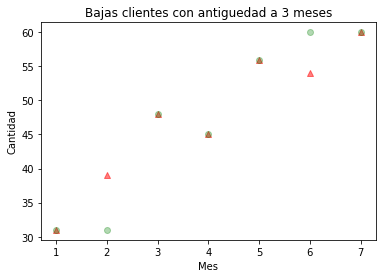

In [7]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad a 3 meses')
plt.show()

In [63]:
x_mes=[]

for _ in list(range(8,13)):
  x_mes.append(_)
x_mes = np.array(x_mes)[:,np.newaxis]


In [55]:
x_mes[0,0]

8

In [79]:
logreg.predict(x_mes[2,0].reshape(-1, 1)) 

array([60])

In [76]:
#Guardamos los resultados
concat_y1, concat_x1 = [],[]

for _ in list(range(len(y_predic_train_m1))):
  concat_y1.append(y_predic_train_m1[_])
  concat_x1.append(x_train[_])

concat_p_x1, concat_p_y1 = [],[]
aux_mes=0
for _ in list(range(8,13)):
  y_predic_mes = logreg.predict(x_mes[aux_mes,0].reshape(-1, 1))  
  print(y_predic_mes) 
  aux_mes=aux_mes+1


[60]
[60]
[60]
[60]
[60]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 2trim
#entrenamos datos
x_train = X[:,0]
x_train = x_train[:,np.newaxis]
y_train = X[:,2]
y_train = y_train[:,np.newaxis]

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))


Precisión Modelo Regresión Logística
0.5714285714285714


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[35]
 [19]
 [24]
 [44]
 [24]
 [20]
 [22]]
Resultado predicción entrenamiento
    0
0  44
1  24
2  24
3  44
4  24
5  24
6  22


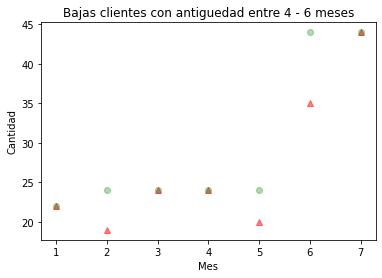

In [28]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 4 - 6 meses')
plt.show()

In [29]:
#Guardamos los resultados
concat_y2, concat_x2 = [],[]

for _ in list(range(len(y_predic_train_m1))):
  concat_y2.append(y_predic_train_m1[_])
  concat_x2.append(x_train[_])
 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 3trim
#entrenamos datos
x_train = X[:,0]
x_train = x_train[:,np.newaxis]
y_train = X[:,3]
y_train = y_train[:,np.newaxis]

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[23]
 [32]
 [25]
 [27]
 [20]
 [24]
 [22]]
Resultado predicción entrenamiento
    0
0  27
1  22
2  25
3  27
4  20
5  24
6  22


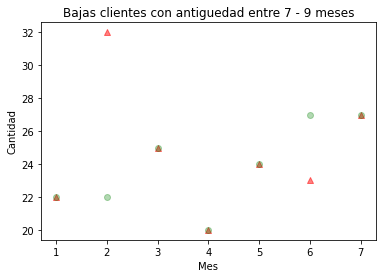

In [32]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 7 - 9 meses')
plt.show()

In [33]:
#Guardamos los resultados
concat_y3, concat_x3 = [],[]

for _ in list(range(len(y_predic_train_m1))):
  concat_y3.append(y_predic_train_m1[_])
  concat_x3.append(x_train[_])
 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# 4trim
#entrenamos datos
x_train = X[:,0]
x_train = x_train[:,np.newaxis]
y_train = X[:,4]
y_train = y_train[:,np.newaxis]

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[174]
 [343]
 [240]
 [166]
 [173]
 [203]
 [271]]
Resultado predicción entrenamiento
     0
0  166
1  271
2  240
3  166
4  173
5  203
6  271


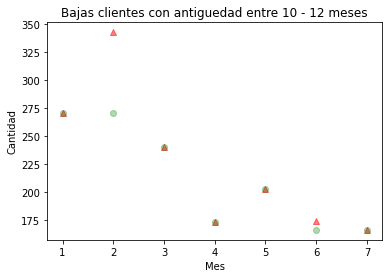

In [36]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 10 - 12 meses')
plt.show()

In [37]:
#Guardamos los resultados
concat_y4, concat_x4 = [],[]

for _ in list(range(len(y_predic_train_m1))):
  concat_y4.append(y_predic_train_m1[_])
  concat_x4.append(x_train[_])
 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# ENTRE_1_2_ANIOS
#entrenamos datos
x_train = X[:,0]
x_train = x_train[:,np.newaxis]
y_train = X[:,5]
y_train = y_train[:,np.newaxis]

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.5714285714285714


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[672]
 [925]
 [736]
 [680]
 [546]
 [546]
 [728]]
Resultado predicción entrenamiento
     0
0  546
1  728
2  546
3  680
4  546
5  546
6  728


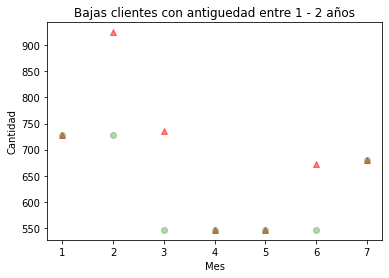

In [40]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 1 - 2 años')
plt.show()

In [41]:
#Guardamos los resultados
concat_y5, concat_x5 = [],[]

for _ in list(range(len(y_predic_train_m1))):
  concat_y5.append(y_predic_train_m1[_])
  concat_x5.append(x_train[_])

 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# ENTRE_3_4_ANIOS
#entrenamos datos
x_train = X[:,0]
x_train = x_train[:,np.newaxis]
y_train = X[:,6]
y_train = y_train[:,np.newaxis]

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[369]
 [511]
 [424]
 [383]
 [318]
 [314]
 [399]]
Resultado predicción entrenamiento
     0
0  383
1  399
2  424
3  383
4  318
5  314
6  399


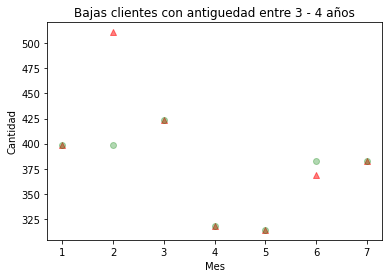

In [44]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad entre 3 - 4 años')
plt.show()

In [45]:
#Guardamos los resultados
concat_y6, concat_x6 = [],[]

for _ in list(range(len(y_predic_train_m1))):
  concat_y6.append(y_predic_train_m1[_])
  concat_x6.append(x_train[_])
 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# MAS_5_ANIOS
#entrenamos datos
x_train = X[:,0]
x_train = x_train[:,np.newaxis]
y_train = X[:,7]
y_train = y_train[:,np.newaxis]

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_predic_train_m1 = logreg.predict(x_train)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

Precisión Modelo Regresión Logística
0.7142857142857143


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print('Datos entrenamiento')
print(y_train)
print('Resultado predicción entrenamiento')
print(pd.DataFrame(y_predic_train_m1))

Datos entrenamiento
[[58]
 [22]
 [38]
 [73]
 [29]
 [21]
 [19]]
Resultado predicción entrenamiento
    0
0  73
1  19
2  38
3  73
4  29
5  21
6  19


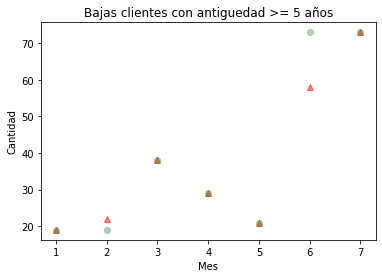

In [48]:
plt.scatter(x_train, y_train, c='red', marker='^', alpha=0.5)
plt.scatter(x_train, y_predic_train_m1, c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad >= 5 años')
plt.show()

In [49]:
#Guardamos los resultados
concat_y7, concat_x7 = [],[]

for _ in list(range(len(y_predic_train_m1))):
  concat_y7.append(y_predic_train_m1[_])
  concat_x7.append(x_train[_])

 

In [50]:
eje_x, eje_y = [],[]

for _ in list(range(len(concat_x1))):  
  eje_x.append(int(concat_x1[_]))
  eje_y.append(int(concat_y1[_]))

for _ in list(range(len(concat_x1))):    
  eje_y[_] = eje_y[_] + int(concat_y2[_])
  eje_y[_] = eje_y[_] + int(concat_y3[_])
  eje_y[_] = eje_y[_] + int(concat_y4[_])
  eje_y[_] = eje_y[_] + int(concat_y5[_])
  eje_y[_] = eje_y[_] + int(concat_y6[_])
  eje_y[_] = eje_y[_] + int(concat_y7[_])

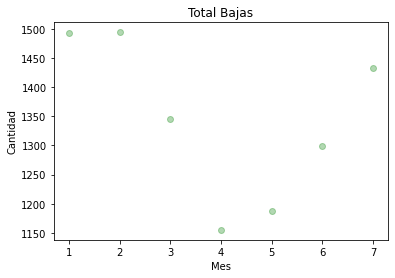

In [51]:
plt.scatter(eje_x , eje_y , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Total Bajas')
plt.show()

In [52]:
eje_y

[1299, 1494, 1345, 1433, 1155, 1188, 1492]

In [53]:
eje_x

[6, 2, 3, 7, 4, 5, 1]

In [80]:
quede aqui, guardar en cada agrupacionm los datos de la predicciion y listo
x_mes=[]
x_mes.append(4)
 
y_predic_mes = logreg.predict([x_mes])
print(y_predic_mes)

[29]
